## Homework Assignment 5


## Collaborative Filtering for Recommending Songs to Music Listeners

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Data Loading
music_rating_train = pd.read_csv("MusicRatingsTrain.csv")
music_rating_valA = pd.read_csv("MusicRatingsValidationA.csv")
music_rating_valB = pd.read_csv("MusicRatingsValidationB.csv")
music_rating_test = pd.read_csv("MusicRatingsTest.csv")

In [3]:
music_rating_train.shape, music_rating_valA.shape, music_rating_valB.shape, music_rating_test.shape

((245997, 7), (14470, 7), (14471, 7), (14471, 7))

In [4]:
music_rating_train.head()

,userID,songID,rating,songName,year,artist,genre
0,2071,581,2.484754,Show You How,2004,The Killers,Rock
1,1208,55,1.000000,Luvstruck,1999,Southside Spinners,Electronic
2,1484,510,1.000000,In One Ear,2008,Cage The Elephant,Rock
3,453,299,1.000000,Gardenhead / Leave Me Alone,1992,Neutral Milk Hotel,Rock
4,2238,113,1.000000,Hustler,2006,Simian Mobile Disco,Electronic


## a) 

How  many  songs  are  in  the  training  dataset?   How  many  users?   Based  on  thetraining set, provide summary statistics (mean, median, standard deviation, min, and max) for therating variable.

There are 807 songs and a total of 2421 users.

In [32]:
print(len(np.unique(music_rating_train.userID)))

2421


In [33]:
print(len(np.unique(music_rating_train.songID)))

807


In [5]:
music_rating_train.describe()

,userID,songID,rating,year
count,245997.000000,245997.000000,245997.000000,245997.000000
mean,1207.942601,398.215917,1.321962,2004.929893
std,699.268070,235.731994,0.459894,4.875750
min,1.000000,1.000000,1.000000,1975.000000
25%,599.000000,190.000000,1.000000,2003.000000
50%,1210.000000,399.000000,1.000000,2007.000000
75%,1815.000000,608.000000,1.494918,2008.000000
max,2421.000000,807.000000,4.768656,2010.000000


## b)

## i)

For this dataset, how many total parameters are included in model (1)?  Howmany observations do we have to train the model with?

For this dataset, the total parameters in model 1 is 3228 as the n = total number of users and m = total number of songs. The total number of parameters = n + m. As n equals to 2421 and m equals to 807, 2421 + 807 = 3228. The parameter equals to 3228. The observation we have to train the model is equal to the number of rating which is 245997.

In [4]:
music_rating_train = music_rating_train.sort_values(by = ['userID', 'songID'])
music_rating_train_df = music_rating_train.pivot_table(index= "userID", columns= "songID", values= "rating", dropna = False)
music_rating_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2421 entries, 1 to 2421
Columns: 807 entries, 1 to 807
dtypes: float64(807)
memory usage: 14.9 MB


In [5]:
music_rating_valA = music_rating_valA.sort_values(by = ['userID', 'songID'])
music_valA_df = music_rating_valA.pivot_table(index= "userID", columns= "songID", values= "rating", dropna = False)
music_valA_df.info()
valA_extra_columns = list(set(range(1, 807+1)) - set(music_valA_df.columns))

music_valA_df[valA_extra_columns] = np.nan
music_valA_df = music_valA_df[music_rating_train_df.columns]
music_valA_df = music_rating_train_df[[]].join(music_valA_df, how = 'outer')
print(music_valA_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 1 to 2421
Columns: 807 entries, 1 to 807
dtypes: float64(807)
memory usage: 14.8 MB
(2421, 807)


In [6]:
music_rating_valB = music_rating_valB.sort_values(by = ['userID', 'songID'])
music_valB_df = music_rating_valB.pivot_table(index= "userID", columns= "songID", values= "rating", dropna = False)
music_valB_df.info()
valB_extra_columns = list(set(range(1, 807+1)) - set(music_valB_df.columns))

music_valB_df[valB_extra_columns] = np.nan
music_valB_df = music_valB_df[music_rating_train_df.columns]
music_valB_df = music_rating_train_df[[]].join(music_valB_df, how = 'outer')
print(music_valB_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 1 to 2421
Columns: 807 entries, 1 to 807
dtypes: float64(807)
memory usage: 14.8 MB
(2421, 807)


In [7]:
music_rating_test = music_rating_test.sort_values(by = ['userID', 'songID'])
music_test_df = music_rating_test.pivot_table(index= "userID", columns= "songID", values= "rating", dropna = False)
music_test_df.info()
test_extra_columns = list(set(range(1, 807+1)) - set(music_test_df.columns))

music_test_df[test_extra_columns] = np.nan
music_test_df = music_test_df[music_rating_train_df.columns]
music_test_df = music_rating_train_df[[]].join(music_test_df, how = 'outer')
print(music_test_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 1 to 2421
Columns: 807 entries, 1 to 807
dtypes: float64(807)
memory usage: 14.9 MB
(2421, 807)


In [8]:
music_train_mat = music_rating_train_df.to_numpy()
music_valA_mat = music_valA_df.to_numpy()
music_valB_mat = music_valB_df.to_numpy()
music_test_mat = music_test_df.to_numpy()

music_train_mat.shape, music_valA_mat.shape, music_valB_mat.shape, music_test_mat.shape

((2421, 807), (2421, 807), (2421, 807), (2421, 807))

In [9]:
music_train_mask = ~np.isnan(music_train_mat)
music_valA_mask = ~np.isnan(music_valA_mat)
music_valB_mask = ~np.isnan(music_valB_mat)
music_test_mask = ~np.isnan(music_test_mat)

print(np.sum(music_train_mask))
print(np.sum(music_valA_mask))
print(np.sum(music_valB_mask))
print(np.sum(music_test_mask))

245997
14470
14471
14471


## Biscale Centering

In [10]:
from fancyimpute import BiScaler

In [11]:
music_biscaler = BiScaler(scale_rows=False, scale_columns=False, verbose=True)
music_train_mat_centered = music_biscaler.fit_transform(music_train_mat)

[BiScaler] Initial log residual value = 8.635876
[BiScaler] Iter 1: log residual = -1.278081, log improvement ratio=9.913958
[BiScaler] Iter 2: log residual = -2.464318, log improvement ratio=1.186237
[BiScaler] Iter 3: log residual = -3.599288, log improvement ratio=1.134970
[BiScaler] Iter 4: log residual = -4.728969, log improvement ratio=1.129681
[BiScaler] Iter 5: log residual = -5.851105, log improvement ratio=1.122136
[BiScaler] Iter 6: log residual = -6.961307, log improvement ratio=1.110202
[BiScaler] Iter 7: log residual = -8.052791, log improvement ratio=1.091484
[BiScaler] Iter 8: log residual = -9.115833, log improvement ratio=1.063043
[BiScaler] Iter 9: log residual = -10.137984, log improvement ratio=1.022150
[BiScaler] Iter 10: log residual = -11.105953, log improvement ratio=0.967969
[BiScaler] Iter 11: log residual = -12.009465, log improvement ratio=0.903512
[BiScaler] Iter 12: log residual = -12.845445, log improvement ratio=0.835981
[BiScaler] Iter 13: log residual

## Biscaler Estimation

In [12]:
import copy
music_centered_0 = copy.copy(music_train_mat_centered)
music_centered_0[np.isnan(music_centered_0)]=0
music_centered_0

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.32958053, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28600431, 0.11124078, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
music_BiScaler_filled = music_biscaler.inverse_transform(music_centered_0)
music_BiScaler_filled

array([[1.34450503, 1.51787035, 1.69263387, ..., 1.55709616, 1.41842513,
        1.40129053],
       [1.4868899 , 1.98983574, 1.83501874, ..., 1.69948103, 1.56081   ,
        1.5436754 ],
       [0.98649909, 1.15986441, 1.33462793, ..., 1.19909023, 1.0604192 ,
        1.0432846 ],
       ...,
       [1.10753272, 1.28089804, 1.45566156, ..., 1.32012386, 1.18145283,
        1.16431823],
       [1.01559836, 1.18896367, 1.3637272 , ..., 1.22818949, 1.08951846,
        1.07238386],
       [1.03554825, 1.49491787, 1.49491787, ..., 1.24813938, 1.10946835,
        1.09233375]])

In [14]:
# Access the alpha (row_mean) and beta (column) values
alpha = music_biscaler.row_means
beta = music_biscaler.column_means

## Softimpute

We don't have to consider softimpute however did it to check the output just in case

In [15]:
from fancyimpute import SoftImpute

music_soft_imputer = SoftImpute(max_rank=5, verbose=True)
music_centered_filled = music_soft_imputer.fit_transform(music_train_mat_centered)

[SoftImpute] Max Singular Value of X_init = 35.403705
[SoftImpute] Iter 1: observed MAE=0.276595 rank=5
[SoftImpute] Iter 2: observed MAE=0.272222 rank=5
[SoftImpute] Iter 3: observed MAE=0.269771 rank=5
[SoftImpute] Iter 4: observed MAE=0.268023 rank=5
[SoftImpute] Iter 5: observed MAE=0.266677 rank=5
[SoftImpute] Iter 6: observed MAE=0.265593 rank=5
[SoftImpute] Iter 7: observed MAE=0.264694 rank=5
[SoftImpute] Iter 8: observed MAE=0.263930 rank=5
[SoftImpute] Iter 9: observed MAE=0.263269 rank=5
[SoftImpute] Iter 10: observed MAE=0.262688 rank=5
[SoftImpute] Iter 11: observed MAE=0.262173 rank=5
[SoftImpute] Iter 12: observed MAE=0.261714 rank=5
[SoftImpute] Iter 13: observed MAE=0.261302 rank=5
[SoftImpute] Iter 14: observed MAE=0.260932 rank=5
[SoftImpute] Iter 15: observed MAE=0.260600 rank=5
[SoftImpute] Iter 16: observed MAE=0.260301 rank=5
[SoftImpute] Iter 17: observed MAE=0.260029 rank=5
[SoftImpute] Iter 18: observed MAE=0.259782 rank=5
[SoftImpute] Iter 19: observed MAE=0.

In [16]:
music_SoftImpute_filled = music_biscaler.inverse_transform(music_centered_filled)
music_SoftImpute_filled = np.clip(music_SoftImpute_filled, 1, 5) 
music_SoftImpute_filled

array([[1.28345067, 1.39693048, 1.49674834, ..., 1.38946759, 1.44060186,
        1.34441623],
       [1.55916447, 1.98983574, 1.47405209, ..., 1.75165172, 1.73070318,
        1.73095367],
       [1.        , 1.14794614, 1.41776411, ..., 1.21620616, 1.05776162,
        1.05966091],
       ...,
       [1.08038564, 1.10513781, 1.51404337, ..., 1.49189708, 1.06633144,
        1.23333647],
       [1.10733408, 1.10929707, 1.08857627, ..., 1.18209517, 1.201522  ,
        1.        ],
       [1.        , 1.49491787, 1.49491787, ..., 1.27487904, 1.11650221,
        1.04938383]])

## ii)

Using the output of theBiScaler, what are the three most popular songsafter  removing  for  the  bias  due  to  users’  affinity  for  rating  songs  highly  (or  lowly)?Provide the song ID numbers as well as the song and artist names for these three songs.Explain, in your own words, how your answer relates to model.

Below is the output.

The answer relates to the model because the beta is coefficient depending on the songID and these values are the biscaler column means. The largest Beta J value is where the three most popular songs with highest ratings are after removing the bias due to users' affinity.

The song ID number is [438, 25,  53]. 

The song name is Seven Nation Army, Korg Rhythm Afro, Stay Where You Are.

The artists names for these three songs are the White Stripes, Holy Fuck, and Sleater-kinney.



In [16]:
#songid
arr_beta = np.argsort(beta)[-3:] 
songid_list = arr_beta.tolist()
songid_list

[438, 25, 53]

In [17]:
top_three_songs = music_rating_train[music_rating_train.songID.isin(songid_list)]
top_three_songs['songName'].drop_duplicates()

172045     Seven Nation Army
135390      Korg Rhythm Afro
33397     Stay Where You Are
Name: songName, dtype: object

In [18]:
top_three_songs = music_rating_train[music_rating_train.songID.isin(songid_list)]
top_three_songs['artist'].drop_duplicates()

172045    The White Stripes
135390            Holy Fuck
33397        Sleater-kinney
Name: artist, dtype: object

## iii)

Likewise, which three users are the most enthused about songs after removingfor the bias due to the effect of the popularity of songs?  Provide the user ID numbersof these three users.  No need to provide an explanation.

The user ID for these three users are [1568, 837, 1539]. 

In [17]:
#userid
arr_alpha = np.argsort(alpha)[-3:]
userid_list = arr_alpha.tolist()
print(userid_list)

[1568, 837, 1539]


## iv)

What is the out-of-sample performance of the fitted model on the providedtest set?  Report the test set MAE, RMSE, and the OSR2 values.

## Test Set Performance

In [18]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

## Performance with Biscale

In [19]:
music_test_mae = masked_mae(music_test_mat, music_BiScaler_filled, music_test_mask)
print("Biscale MAE %s " % (music_test_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 10-(-10)=20.

music_test_mse = masked_mse(music_test_mat, music_BiScaler_filled, music_test_mask)
print("Biscale RMSE %s " % (np.sqrt(music_test_mse)/4))

baseline_pred = np.mean(music_rating_train)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(music_test_mat, baseline_model, music_test_mask)
print("Biscale OSR2 %s" % OSR2(music_test_mse, baseline_mse))

Biscale MAE 0.0747571775133017 
Biscale RMSE 0.0985693901114982 
Biscale OSR2 0.2702373901935097


## Performance with Softimpute

In [20]:
music_test_mae = masked_mae(music_test_mat, music_SoftImpute_filled, music_test_mask)
print("SoftImpute MAE %s " % (music_test_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 10-(-10)=20.

music_test_mse = masked_mse(music_test_mat, music_SoftImpute_filled, music_test_mask)
print("SoftImpute RMSE %s " % (np.sqrt(music_test_mse)/4))

baseline_pred = np.mean(music_rating_train)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(music_test_mat, baseline_model, music_test_mask)
print("SoftImpute OSR2 %s" % OSR2(music_test_mse, baseline_mse))

SoftImpute MAE 0.07090405508194468 
SoftImpute RMSE 0.09656562777134375 
SoftImpute OSR2 0.29960569586445585


## c)

## i)

For this dataset, how many total parameters are included in model (2) (theanswer should depend onk)?  How many observations do we have to train the modelwith?

The total parameter equals to 807 + 2421 + (807*k) = 3228 + (807*k) in model(2).

We have to train the model with 245997 observations, which is equal to the total length of rating on music rating train dataset.


## ii)

Using  the  provided  validation  set  A,  determine  the  value  ofk,  i.e.,  the  number  ofarchetypes,  that  should  be  selected.   Use  a  plot  to  justify  and  explain  the  value  of k that you selected.

According to the plot above, we are iterating the range from 1 to 20 on the validation set A. The graph plots the validation MAE values and the lowest MAE in our case would be at k = 4.

Therefore the obervations we need to train the model are 4 * 807 = 3228. And the number of parameters are going to be number of number of rows + number of columns which is 807 + 4 = 811.

In [21]:
music_valA_mae_lst = []
for i in range(20):
    param_cv = i+1
    music_soft_imputer_cv = SoftImpute(max_rank=param_cv, verbose=False)
    music_centered_filled_cv = music_soft_imputer_cv.fit_transform(music_train_mat_centered)
    music_filled_cv = music_biscaler.inverse_transform(music_centered_filled_cv)
    music_filled_cv = np.clip(music_filled_cv, 1, 5)
    music_valA_mae_cv = masked_mae(music_valA_mat, music_filled_cv, music_valA_mask)
    music_valA_mae_lst.append(music_valA_mae_cv)
    print('iter %s - Validation MAE %s' % (param_cv, music_valA_mae_cv))

iter 1 - Validation MAE 0.2885634518667774
iter 2 - Validation MAE 0.28500121297797326
iter 3 - Validation MAE 0.2837867835747125
iter 4 - Validation MAE 0.2820231031496958
iter 5 - Validation MAE 0.2831439714205493
iter 6 - Validation MAE 0.2826094102603166
iter 7 - Validation MAE 0.28458407348601406
iter 8 - Validation MAE 0.2851844490181127
iter 9 - Validation MAE 0.2858040476209231
iter 10 - Validation MAE 0.28547984285183964
iter 11 - Validation MAE 0.2879752234507606
iter 12 - Validation MAE 0.28910102265746274
iter 13 - Validation MAE 0.2898415855585168
iter 14 - Validation MAE 0.2935896748594369
iter 15 - Validation MAE 0.2945718362743434
iter 16 - Validation MAE 0.29618740759125856
iter 17 - Validation MAE 0.2976931208274731
iter 18 - Validation MAE 0.2983513563550037
iter 19 - Validation MAE 0.30094743761703024
iter 20 - Validation MAE 0.30400269235062105


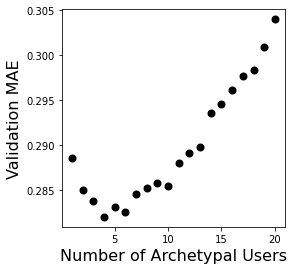

In [22]:
import matplotlib.pyplot as plt
x = range(1,21)
y = music_valA_mae_lst
plt.figure(figsize = (4,4))
plt.scatter(x, y, linewidth = 2, color = 'black')
plt.xlabel('Number of Archetypal Users', fontsize = 16)
plt.ylabel('Validation MAE', fontsize = 16)
plt.show()

## iii)

We  will  fit  the  model  (2)  by  using  the  previously  computed  estimates  ofαandβfrom  part  (b).   That  is,  letting  ˆαandˆβdenote  these  estimates,  we  will  useSoftImputeto fit a collaborative filtering model on the incomplete training set matrixofresidualsXCi,j:=Xi,j−ˆαi−ˆβj.

Build a final collaborative filtering model on the training set using the previ-ously determined value of k.  What is the out-of-sample performance of the fitted modelon the provided test set?  Report the test set MAE, RMSE, and theOSR2values.

In [23]:
music_soft_imputer = SoftImpute(max_rank= 4, verbose= False)
music_centered_filled = music_soft_imputer.fit_transform(music_train_mat_centered)
movie_filled_matrix = music_biscaler.inverse_transform(music_centered_filled)
music_filled_matrix = np.clip(movie_filled_matrix, 1, 5 )

In [24]:
#collaborative fitting model on the training set
music_test_mae = masked_mae(music_test_mat, music_filled_matrix,music_test_mask)
print("MAE %s " % (music_test_mae/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

music_test_mse = masked_mse(music_test_mat, music_filled_matrix,music_test_mask)

print("RMSE %s " % (np.sqrt(music_test_mse)/4))

baseline_pred = np.mean(music_rating_train)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(music_test_mat, baseline_model, music_test_mask)

print("OSR2 %s " % OSR2(music_test_mse, baseline_mse))

MAE 0.07063690502316015 
RMSE 0.09598278651787194 
OSR2 0.3080349218852486 


In [25]:
val_pred_cf = music_filled_matrix[music_test_mask]
blend_test_df = music_rating_test.reset_index()[['userID', 'songID', 'rating']]

blend_test_df['val_pred_cf'] = val_pred_cf
blend_test_df

,userID,songID,rating,val_pred_cf
0,1,7,1.989836,2.041785
1,1,753,1.784426,1.746666
2,2,72,1.784426,1.610096
3,2,481,1.000000,1.452155
4,2,507,1.784426,1.700693
...,...,...,...,...
14466,2421,483,1.989836,1.214315
14467,2421,498,1.494918,1.459803
14468,2421,540,1.000000,1.237484
14469,2421,716,1.000000,1.157996


## d)

## i)

First,  fit two distinct models to predict the rating based on the followingindependent variables:(i)genre of the song,(ii)year that the song was released.  Be sureto treat(i)and(ii)as categorical variables and to build the model using only the sametraining set as before.  You may use validation set A to tune any (hyper)parameters, ifyou wish.  Report the test set MAE, RMSE, and theOSR2values of your two models.

## Linear Regression

In [26]:
music_rating_train['year'] = music_rating_train.year.astype('category')
music_rating_train['genre'] = music_rating_train.genre.astype('category')

music_rating_valA['year'] = music_rating_valA.year.astype('category')
music_rating_valA['genre'] = music_rating_valA.genre.astype('category')

music_rating_test['year'] = music_rating_test.year.astype('category')
music_rating_test['genre'] = music_rating_test.genre.astype('category')

In [27]:
#Only include the two features in the ols 'genre' and 'year'
import statsmodels.formula.api as smf
music_rating_ols = smf.ols(formula="rating ~ genre + year", data=music_rating_train)
res = music_rating_ols.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     261.6
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:46:43   Log-Likelihood:            -1.5373e+05
No. Observations:              245997   AIC:                         3.075e+05
Df Residuals:                  245963   BIC:                         3.079e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.0937    

In [28]:
val_pred_ols = res.predict(music_rating_test)
blend_test_df['val_pred_ols'] = val_pred_ols
blend_test_df

,userID,songID,rating,val_pred_cf,val_pred_ols
0,1,7,1.989836,2.041785,2.027701
1,1,753,1.784426,1.746666,1.499118
2,2,72,1.784426,1.610096,2.027701
3,2,481,1.000000,1.452155,2.027701
4,2,507,1.784426,1.700693,1.455833
...,...,...,...,...,...
14466,2421,483,1.989836,1.214315,1.328672
14467,2421,498,1.494918,1.459803,1.287079
14468,2421,540,1.000000,1.237484,1.287079
14469,2421,716,1.000000,1.157996,1.287079


In [36]:
val_mae_ols = np.mean(np.abs(music_test_mat[music_test_mask] - val_pred_ols))
print("Test MAE %s " % (val_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_ols = np.mean((music_test_mat[music_test_mask] - val_pred_ols)**2)
print("Test RMSE %s " % (np.sqrt(val_mse_ols)/4))

print("Test OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

Test MAE 0.09235568153592498 
Test RMSE 0.11312545968408344 
Test OSR2 0.038790215131095374 


## Random Forest

In [43]:
music_rating_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245997 entries, 116572 to 237241
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   userID    245997 non-null  int64   
 1   songID    245997 non-null  int64   
 2   rating    245997 non-null  float64 
 3   songName  245997 non-null  object  
 4   year      245997 non-null  category
 5   artist    245997 non-null  object  
 6   genre     245997 non-null  category
dtypes: category(2), float64(1), int64(2), object(2)
memory usage: 11.7+ MB


In [30]:
from sklearn.ensemble import RandomForestRegressor

music_rating_train2 = pd.get_dummies(music_rating_train, columns = ['genre'])

X_train = music_rating_train2.drop(columns = ["userID", "songID", "rating", "songName", "artist"])
y_train = music_rating_train2["rating"]
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   43.6s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [31]:
music_rating_train2.shape

(245997, 13)

In [34]:
music_rating_test2 = pd.get_dummies(music_rating_test, columns = ['genre'])

val_pred_rf=rf.predict(music_rating_test2.drop(columns = ["userID", "songID", "rating", "songName", "artist"]))

blend_test_df['val_pred_rf']=val_pred_rf
blend_test_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.6s finished


,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf
0,1,7,1.989836,2.041785,2.027701,1.313691
1,1,753,1.784426,1.746666,1.499118,1.440233
2,2,72,1.784426,1.610096,2.027701,1.379889
3,2,481,1.000000,1.452155,2.027701,1.131495
4,2,507,1.784426,1.700693,1.455833,1.308723
...,...,...,...,...,...,...
14466,2421,483,1.989836,1.214315,1.328672,1.367414
14467,2421,498,1.494918,1.459803,1.287079,1.403660
14468,2421,540,1.000000,1.237484,1.287079,1.359284
14469,2421,716,1.000000,1.157996,1.287079,1.293198


In [37]:
val_mae_rf = np.mean(np.abs(music_test_mat[music_test_mask] - val_pred_rf))
print("Test MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_rf = np.mean((music_test_mat[music_test_mask] - val_pred_rf)**2)
print("Test RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("Test OSR2 %s " % OSR2(val_mse_rf, baseline_mse))

Test MAE 0.09152666687515919 
Test RMSE 0.11243412826498947 
Test OSR2 0.050502592495190735 


## ii)

Now, use validation set B to perform blending of the collaborative filteringmodel (2) trained in part (c) and the two models trained in part (i) above.  Report thetest set MAE, RMSE, and theOSR2values of the blended model.  Do the additionalfeatures associated with songs add a lot of predictive power on top of the collaborativefiltering model?

In [38]:
music_soft_imputer = SoftImpute(max_rank= 4, verbose= False)
music_centered_filled = music_soft_imputer.fit_transform(music_train_mat_centered)
movie_filled_matrix = music_biscaler.inverse_transform(music_centered_filled)
music_filled_matrix = np.clip(movie_filled_matrix, 1, 5 )

In [54]:
#collaborative fitting model on the training set
val_mae_cf = masked_mae(music_valB_mat, music_filled_matrix,music_valB_mask)
print("MAE %s " % (val_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_cf = masked_mse(music_valB_mat, music_filled_matrix,music_valB_mask)
print("RMSE %s " % (np.sqrt(val_mse_cf)/4))

baseline_pred = np.mean(music_rating_train)[2]
baseline_model = baseline_pred*np.ones((2421, 807))
baseline_mse = masked_mse(music_valB_mat, baseline_model, music_valB_mask)

print("OSR2 %s " % OSR2(val_mse_cf, baseline_mse))

MAE 0.07124956157870051 
RMSE 0.09659832922128747 
OSR2 0.319363874675754 


In [40]:
val_pred_cf = music_filled_matrix[music_valB_mask]
blend_valB_df = music_rating_valB.reset_index()[['userID', 'songID', 'rating']]

blend_valB_df['val_pred_cf'] = val_pred_cf
blend_valB_df

,userID,songID,rating,val_pred_cf
0,1,93,1.989836,2.305456
1,1,462,1.000000,1.498923
2,1,663,1.784426,1.683799
3,2,24,1.000000,1.482973
4,2,47,1.000000,1.636671
...,...,...,...,...
14466,2421,499,1.000000,1.341361
14467,2421,534,1.000000,1.190828
14468,2421,641,1.000000,1.460254
14469,2421,689,1.989836,1.670098


In [41]:
val_pred_ols = res.predict(music_rating_valB)
blend_valB_df['val_pred_ols'] = val_pred_ols
blend_valB_df

,userID,songID,rating,val_pred_cf,val_pred_ols
0,1,93,1.989836,2.305456,1.379862
1,1,462,1.000000,1.498923,1.419076
2,1,663,1.784426,1.683799,1.313628
3,2,24,1.000000,1.482973,1.376242
4,2,47,1.000000,1.636671,1.179410
...,...,...,...,...,...
14466,2421,499,1.000000,1.341361,1.285387
14467,2421,534,1.000000,1.190828,1.381367
14468,2421,641,1.000000,1.460254,1.287079
14469,2421,689,1.989836,1.670098,1.378003


In [42]:
val_mae_ols = np.mean(np.abs(music_valB_mat[music_valB_mask] - val_pred_ols))
print("Test MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_ols = np.mean((music_valB_mat[music_valB_mask] - val_pred_ols)**2)
print("Test RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("Test OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

Test MAE 0.09152666687515919 
Test RMSE 0.11243412826498947 
Test OSR2 0.03032293335148306 


Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

music_rating_train2 = pd.get_dummies(music_rating_train, columns = ['genre'])

X_train = music_rating_train2.drop(columns = ["userID", "songID", "rating", "songName", "artist"])
y_train = music_rating_train2["rating"]
rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   40.7s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [45]:
music_rating_valB2 = pd.get_dummies(music_rating_valB, columns = ['genre'])

val_pred_rf=rf.predict(music_rating_valB2.drop(columns = ["userID", "songID", "rating", "songName", "artist"]))

blend_valB_df['val_pred_rf']=val_pred_rf
blend_valB_df

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.5s finished


,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf
0,1,93,1.989836,2.305456,1.379862,1.322405
1,1,462,1.000000,1.498923,1.419076,1.359284
2,1,663,1.784426,1.683799,1.313628,1.337721
3,2,24,1.000000,1.482973,1.376242,1.315066
4,2,47,1.000000,1.636671,1.179410,1.239557
...,...,...,...,...,...,...
14466,2421,499,1.000000,1.341361,1.285387,1.313691
14467,2421,534,1.000000,1.190828,1.381367,1.220499
14468,2421,641,1.000000,1.460254,1.287079,1.297004
14469,2421,689,1.989836,1.670098,1.378003,1.379889


In [47]:
val_mae_rf = np.mean(np.abs(music_valB_mat[music_valB_mask] - val_pred_rf))
print("Test MAE %s " % (val_mae_rf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_rf = np.mean((music_valB_mat[music_valB_mask] - val_pred_rf)**2)
print("Test RMSE %s " % (np.sqrt(val_mse_rf)/4))

print("Test OSR2 %s " % OSR2(val_mse_rf, baseline_mse))

Test MAE 0.09277268485444236 
Test RMSE 0.11460189288232343 
Test OSR2 0.04201359031384089 


## Blending all Three models together

In [63]:
blending_ols = smf.ols(formula = 'rating ~ val_pred_cf + val_pred_ols + val_pred_rf -1', data = blend_valB_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                          6.025e+04
Date:                Mon, 26 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:21:49   Log-Likelihood:                         -6645.1
No. Observations:               14471   AIC:                                  1.330e+04
Df Residuals:                   14468   BIC:                                  1.332e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [64]:
val_pred_blended = blending_res.predict(blend_valB_df)
blend_valB_df['pred_blended'] = val_pred_blended

blend_valB_df

,userID,songID,rating,val_pred_cf,val_pred_ols,val_pred_rf,pred_blended
0,1,93,1.989836,2.305456,1.379862,1.322405,2.137201
1,1,462,1.000000,1.498923,1.419076,1.359284,1.467415
2,1,663,1.784426,1.683799,1.313628,1.337721,1.615659
3,2,24,1.000000,1.482973,1.376242,1.315066,1.447292
4,2,47,1.000000,1.636671,1.179410,1.239557,1.559638
...,...,...,...,...,...,...,...
14466,2421,499,1.000000,1.341361,1.285387,1.313691,1.324959
14467,2421,534,1.000000,1.190828,1.381367,1.220499,1.191914
14468,2421,641,1.000000,1.460254,1.287079,1.297004,1.422692
14469,2421,689,1.989836,1.670098,1.378003,1.379889,1.611554


In [65]:
val_mae_blended = np.mean(np.abs(music_valB_mat[music_valB_mask] - val_pred_blended))
print("MAE %s " % (val_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

val_mse_blended = np.mean((music_valB_mat[music_valB_mask] - val_pred_blended)**2)
print("RMSE %s " % (np.sqrt(val_mse_blended)/4))

print("OSR2 %s " % OSR2(val_mse_blended, baseline_mse))

MAE 0.07257326475409621 
RMSE 0.0957483570766122 
OSR2 0.3312890608582316 


## Performance on Test Set

In [66]:
baseline_pred = np.mean(music_rating_train_df)[2]
baseline_model = baseline_pred * np.ones((2421, 807))
baseline_mse = masked_mse(music_test_mat, baseline_model, music_test_mask)
baseline_mse

0.21324071576703066

In [67]:
test_mae_cf = masked_mae(music_test_mat, baseline_model, music_test_mask)
print("MAE %s " % (test_mae_cf/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_cf = masked_mse(music_test_mat, baseline_model, music_test_mask)
print("RMSE %s " % (np.sqrt(test_mse_cf)/4))

print("OSR2 %s " % OSR2(val_mse_blended, baseline_mse))

MAE 0.09415697994422612 
RMSE 0.11544498575269269 
OSR2 0.3121202693477084 


In [68]:
test_pred_cf = music_filled_matrix[music_test_mask]
blend_test_df = music_rating_test.reset_index()[['userID', 'songID', 'rating']]

blend_test_df['test_pred_cf'] = test_pred_cf
blend_test_df

,userID,songID,rating,test_pred_cf
0,1,7,1.989836,2.041785
1,1,753,1.784426,1.746666
2,2,72,1.784426,1.610096
3,2,481,1.000000,1.452155
4,2,507,1.784426,1.700693
...,...,...,...,...
14466,2421,483,1.989836,1.214315
14467,2421,498,1.494918,1.459803
14468,2421,540,1.000000,1.237484
14469,2421,716,1.000000,1.157996


In [69]:
test_pred_ols = res.predict(music_rating_test)
blend_test_df['test_pred_ols'] = test_pred_ols
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols
0,1,7,1.989836,2.041785,2.027701
1,1,753,1.784426,1.746666,1.499118
2,2,72,1.784426,1.610096,2.027701
3,2,481,1.000000,1.452155,2.027701
4,2,507,1.784426,1.700693,1.455833
...,...,...,...,...,...
14466,2421,483,1.989836,1.214315,1.328672
14467,2421,498,1.494918,1.459803,1.287079
14468,2421,540,1.000000,1.237484,1.287079
14469,2421,716,1.000000,1.157996,1.287079


In [70]:
test_mae_ols = np.mean(np.abs(music_test_mat[music_test_mask] - test_pred_ols))
print("MAE %s " % (test_mae_ols/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_ols = np.mean((music_test_mat[music_test_mask] - test_pred_ols)**2)
print("RMSE %s " % (np.sqrt(test_mse_ols)/4))

print("OSR2 %s " % OSR2(val_mse_ols, baseline_mse))

MAE 0.09235568153592498 
RMSE 0.11312545968408344 
OSR2 0.014552634193164216 


In [71]:
blend_test_df['test_pred_rf']= val_pred_rf
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols,test_pred_rf
0,1,7,1.989836,2.041785,2.027701,1.322405
1,1,753,1.784426,1.746666,1.499118,1.359284
2,2,72,1.784426,1.610096,2.027701,1.337721
3,2,481,1.000000,1.452155,2.027701,1.315066
4,2,507,1.784426,1.700693,1.455833,1.239557
...,...,...,...,...,...,...
14466,2421,483,1.989836,1.214315,1.328672,1.313691
14467,2421,498,1.494918,1.459803,1.287079,1.220499
14468,2421,540,1.000000,1.237484,1.287079,1.297004
14469,2421,716,1.000000,1.157996,1.287079,1.379889


In [72]:
blend_test_temp = blend_test_df.rename(columns={"test_pred_cf":"val_pred_cf","test_pred_ols":"val_pred_ols","test_pred_rf":"val_pred_rf" })
test_pred_blended =blending_res.predict(blend_test_temp)
blend_test_df['pred_blended']= test_pred_blended
blend_test_df

,userID,songID,rating,test_pred_cf,test_pred_ols,test_pred_rf,pred_blended
0,1,7,1.989836,2.041785,2.027701,1.322405,1.941726
1,1,753,1.784426,1.746666,1.499118,1.359284,1.678064
2,2,72,1.784426,1.610096,2.027701,1.337721,1.581899
3,2,481,1.000000,1.452155,2.027701,1.315066,1.447000
4,2,507,1.784426,1.700693,1.455833,1.239557,1.624092
...,...,...,...,...,...,...,...
14466,2421,483,1.989836,1.214315,1.328672,1.313691,1.220240
14467,2421,498,1.494918,1.459803,1.287079,1.220499,1.413517
14468,2421,540,1.000000,1.237484,1.287079,1.297004,1.236098
14469,2421,716,1.000000,1.157996,1.287079,1.379889,1.179049


In [74]:
test_mae_blended = np.mean(np.abs(music_test_mat[music_test_mask] - test_pred_blended))
print("Test_blended MAE  %s " % (test_mae_blended/4)) #Note that we normalize MAE and RMSE by the scale of the ratings, which is 5-1=4.

test_mse_blended = np.mean((music_test_mat[music_test_mask] - test_pred_blended)**2)
print("Test_blended RMSE %s " % (np.sqrt(test_mse_blended)/4))

print("Test_blended OSR2 %s " % OSR2(test_mse_blended, baseline_mse))

Test_blended MAE  0.07216583043706742 
Test_blended RMSE 0.09501610784719701 
Test_blended OSR2 0.32260135458982486 


Additional features associated with the songs add very minimal predictive power to the collaborative model. Looking at the OSR2 of the collaborative filtering model, we get an output of OSR2 = 0.322 and the previous collaborative filtering model without feature was OSR2 = 0.308. This results that there is only a very little difference between that without features and with features. Therefore I can conclude that features related to the song add very little  power to the collaborative filtering model, thus showing not that much significance in increasing the output of OSR^2 value.

This Homework was referenced from lab 10a and lab10b code.